In [ ]:
#Визуализация многомерных данных
#Лаба 1

#Хуан Мануэль Сиало Века
#931904 / #932004

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the modules
import pandas as pd
import seaborn as sns
from numpy import median, mean

In [20]:

#https://github.com/TrainingByPackt/Interactive-Data-Visualization-with-Python/datasets

#reading the data set Athletes.csv
path = '/content/drive/MyDrive/Activities/athlete_events.csv'
olym_athletes= pd.read_csv(path)

In [21]:
olym_athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [28]:
# Medal winners
olym_athletes_winners = olym_athletes.dropna(subset=['Medal'])
olym_athletes_winners.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [34]:
#winners of 2014 Promotion
winners_2014 = olym_athletes_winners[(olym_athletes_winners.Year ==
2014)]
winners_2014.Sport.value_counts()

Ice Hockey                   130
Biathlon                      60
Cross Country Skiing          60
Speed Skating                 51
Figure Skating                45
Short Track Speed Skating     43
Alpine Skiing                 31
Snowboarding                  30
Freestyle Skiing              30
Curling                       24
Luge                          24
Bobsleigh                     24
Ski Jumping                   21
Nordic Combined               18
Skeleton                       6
Name: Sport, dtype: int64

In [42]:
#Top Sports
top_sports=['Basketball','Judo','Swimming','Athletics','Football']

#Winners in 2016 in top Sports
winners_2016 = olym_athletes_winners[(olym_athletes_winners.Year ==
2016)]
top_sports_winners_2016 = winners_2016[(winners_2016.Sport.isin(top_sports))]
top_sports_winners_2016.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1029,576,"Alejandro ""lex"" Abrines Redondo",M,23.0,198.0,93.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Men's Basketball,Bronze
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze
1848,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 100 metres Freestyle,Bronze


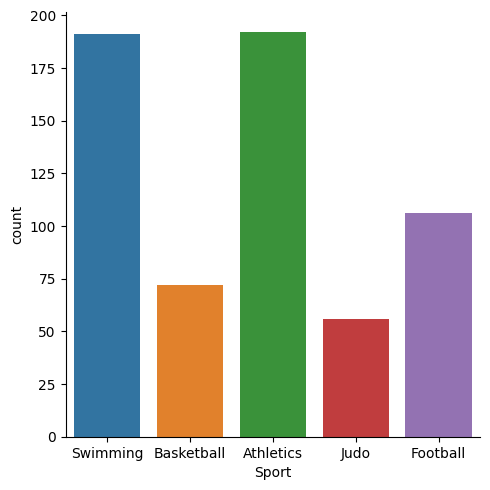

In [57]:
#medals awarded across the top sports (plot)
g= sns.catplot(x='Sport', data=top_sports_winners_2016, kind="count")

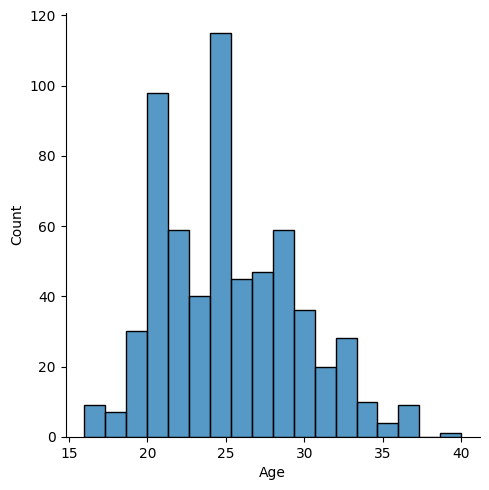

In [61]:
#Age of Athletes
sns.displot(top_sports_winners_2016.Age, kde=False)

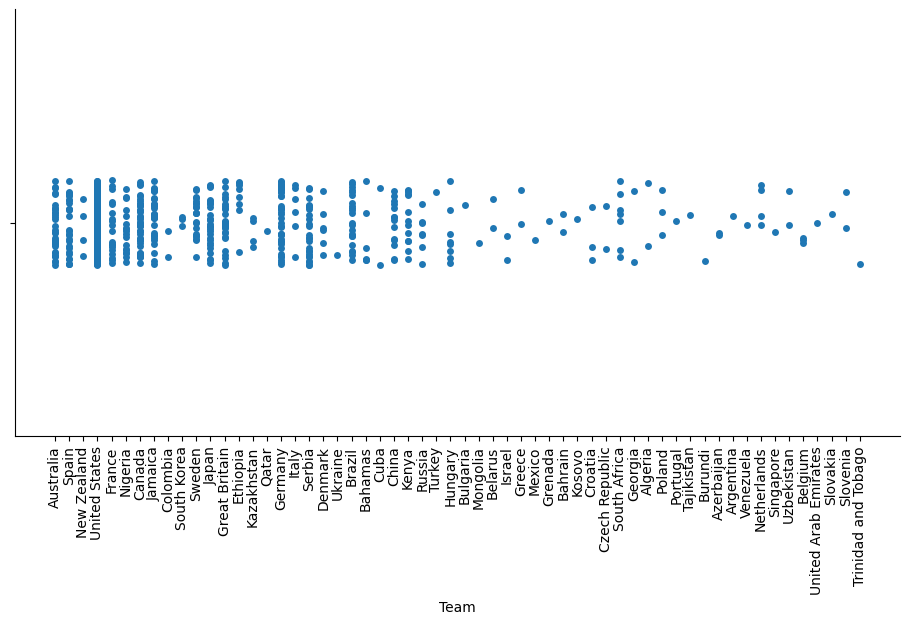

In [74]:
#number of won medals
g = sns.catplot(x='Team', data=top_sports_winners_2016, aspect=1.9)
g.set_xticklabels(rotation=90)

<Axes: xlabel='Sport', ylabel='Weight'>

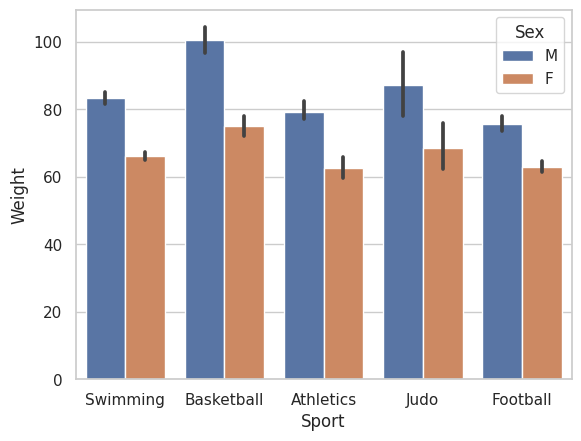

In [77]:
#average weigth of players
sns.set(style='whitegrid')
sns.barplot(x="Sport", y="Weight", data=top_sports_winners_2016, estimator=mean, hue='Sex')